<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week09_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (2141720025)

Diah Putri Nofianti (2141720054)

In [82]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week09"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [84]:
img = cv.imread(f'{path}/plat nomer.jpg')
j = cv.imread(f'{path}/j.png')

# **Dilasi**

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV.

In [85]:
def dilasi(img):
    # Buat SED cross 3x3
    sed = np.ones((3, 3), np.uint8)

    # Dapatkan dimensi citra
    if len(img.shape) == 2:
        height, width = img.shape
    elif len(img.shape) == 3:
        height, width, channels = img.shape

    # Inisialisasi citra hasil dilasi
    dilated_img = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height-1):
        for j in range(1, width-1):
            if len(img.shape) == 2:
                region = img[i-1:i+2, j-1:j+2]
            elif len(img.shape) == 3:
                region = img[i-1:i+2, j-1:j+2, :]
            dilated_img[i, j] = np.max(region * sed)

    return dilated_img

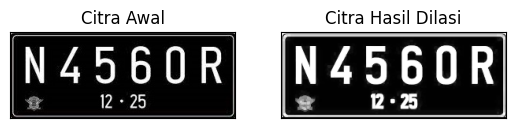

In [86]:
dilated_img = dilasi(img)

plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_img, cmap='gray'),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

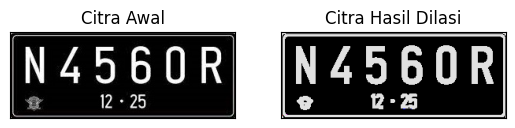

In [87]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)

dilated_img = cv.dilate(thresh, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosi

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV.

In [106]:
def erosi(image):

    # Buat SE cross 5x5
    se = np.ones((5, 5), np.uint8)

    if len(image.shape) == 2:
        height, width = image.shape
        grayscale_image = image
    elif len(image.shape) == 3:
        height, width, channels = image.shape
        grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(2, height-2):
        for j in range(2, width-2):
            region = grayscale_image[i-2:i+3, j-2:j+3]
            # Operasi erosi
            eroded_image[i, j] = 1 if np.all(region * se == se) else 0

    return eroded_image

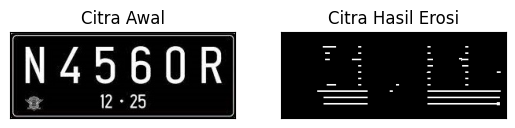

In [107]:
eroded_img = erosi(img)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(eroded_img, cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([])
plt.yticks([])
plt.show()

Buatlah program implementasi operasi erosi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV.

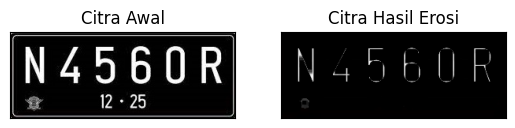

In [90]:
kernel = np.ones((5,5), np.uint8)
eroded_img = cv.erode(img, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(eroded_img, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

# Opening

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa menggunakan library morphology dari
openCV.

In [114]:
def erosi_manual(image):

    # Dapatkan dimensi citra
    if len(img.shape) == 2:
        height, width = img.shape
    elif len(img.shape) == 3:
        height, width, channels = img.shape

    # Buat kernel square 3x3
    kernel = np.ones((3, 3), dtype=np.uint8)

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]
            # Operasi erosi
            if np.all(region * kernel == kernel):
                eroded_image[i, j] = 1

    return eroded_image

In [121]:
def opening(image, kernel_size):
    # Operasi Erosi
    eroded_image = erosi(image)

    # Operasi Dilasi
    opened_image = dilasi(eroded_image)

    return opened_image

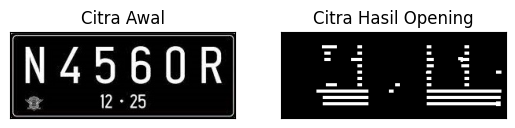

In [122]:
open_img = opening(img, 3)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(open_img, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 dengan menggunakan library morphology dari
openCV.

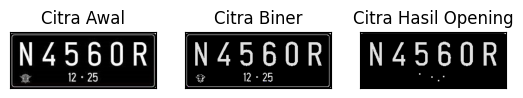

In [93]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
opened_img = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(opened_img, cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

# Closing

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa menggunakan library morphology dari openCV.

In [119]:
def closing(image, kernel_size):
    # Operasi Dilasi
    dilated_image = dilasi(image)

    # Operasi Erosi
    closed_image = erosi(dilated_image)

    return closed_image

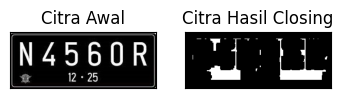

In [120]:
close_img = closing(img, 3)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(close_img,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 dengan menggunakan library morphology dari openCV.

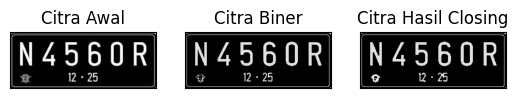

In [95]:
ret, thresh = cv.threshold(img, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
closed_img = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closed_img, cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

# Dilasi

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5.

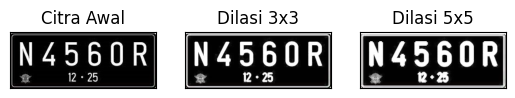

In [96]:
# Buat Structuring Elements (SE)
sed_3x3 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
sed_5x5 = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

# Dilasi dengan SE cross 3x3
dilated_3x3 = cv.dilate(img, sed_3x3, iterations=1)

# Dilasi dengan SE cross 5x5
dilated_5x5 = cv.dilate(img, sed_5x5, iterations=1)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilated_3x3, cmap='gray'), plt.title('Dilasi 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dilated_5x5, cmap='gray'), plt.title('Dilasi 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5.

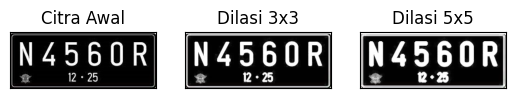

In [97]:
# SE circular 3x3
sed_3x3 = np.zeros((3, 3), dtype=np.uint8)
cv.circle(sed_3x3, (1, 1), 1, 1, -1)

# SE circular 5x5
sed_5x5 = np.zeros((5, 5), dtype=np.uint8)
cv.circle(sed_5x5, (2, 2), 2, 1, -1)

# Dilasi 3x3
dilated_3x3 = cv.dilate(img, sed_3x3, iterations=1)

# Dilasi 5x5
dilated_5x5 = cv.dilate(img, sed_5x5, iterations=1)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilated_3x3, cmap='gray'), plt.title('Dilasi 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dilated_5x5, cmap='gray'), plt.title('Dilasi 5x5')
plt.xticks([]), plt.yticks([])
plt.show()

# Erosi

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7.

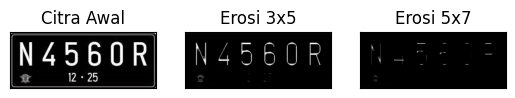

In [98]:
# SE Rectangle 3x5
sed_3x5 = np.ones((3, 5), dtype=np.uint8)

# SE Rectangle 5x7
sed_5x7 = np.ones((5, 7), dtype=np.uint8)

# Erosi 3x5
eroded_3x5 = cv.erode(img, sed_3x5, iterations=1)

# Erosi 5x7 SE
eroded_5x7 = cv.erode(img, sed_5x7, iterations=1)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded_3x5, cmap='gray'), plt.title('Erosi 3x5')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(eroded_5x7, cmap='gray'), plt.title('Erosi 5x7')
plt.xticks([]), plt.yticks([])
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5.

In [99]:
# SE Line Vertikal 3
sed_line_3 = np.ones((3, 1), dtype=np.uint8)

# Perform erosion with vertical line SE (3 pixels)
def erode_with_vertical_line_3(img, sed):
    # Dapatkan dimensi citra
    if len(img.shape) == 2:
        height, width = img.shape
    elif len(img.shape) == 3:
        height, width, channels = img.shape

    sed_height, sed_width = sed.shape

    half_sed_height = sed_height // 2

    eroded_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(half_sed_height, height - half_sed_height):
        for j in range(width):
            region = img[i - half_sed_height:i + half_sed_height + 1, j]
            min_val = np.min(region * sed)
            eroded_img[i, j] = min_val

    return eroded_img

eroded_line_3 = erode_with_vertical_line_3(img, sed_line_3)

In [100]:
# SE Line Vertikal 5
sed_line_5 = np.ones((5, 1), dtype=np.uint8)

# Perform erosion with vertical line SE (5 pixels)
def erode_with_vertical_line_5(img, sed):
    # Dapatkan dimensi citra
    if len(img.shape) == 2:
        height, width = img.shape
    elif len(img.shape) == 3:
        height, width, channels = img.shape
    sed_height, sed_width = sed.shape

    half_sed_height = sed_height // 2

    eroded_img = np.zeros((height, width), dtype=np.uint8)

    for i in range(half_sed_height, height - half_sed_height):
        for j in range(width):
            region = img[i - half_sed_height:i + half_sed_height + 1, j]
            min_val = np.min(region * sed)
            eroded_img[i, j] = min_val

    return eroded_img

eroded_line_5 = erode_with_vertical_line_5(img, sed_line_5)

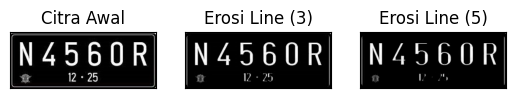

In [101]:
# Display the results
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded_line_3, cmap='gray'), plt.title('Erosi Line (3)')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(eroded_line_5, cmap='gray'), plt.title('Erosi Line (5)')
plt.xticks([]), plt.yticks([])
plt.show()

# Top Hat

# Black Hat

# Skeleton

# Skeleton Inverse

# Thickening

# **Tugas**